In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import extcolors
import pandas as pd

In [58]:
def prepareDataset(dataPath, dim, outputPath):
    print("Starting Data Preparing: ")
    print("[ ", end = "")
    count = 0
    for i in os.listdir(dataPath):
        img = cv2.imread(os.path.join(dataPath, i))
        if(img.shape[0] < img.shape[1]):
            count += 1
            if(count % 500 == 0):
                print(" ]")
                print("[ ", end = "")
            elif(count % 5 == 0):
                print("=", end = "")
            resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            cv2.imwrite(os.path.join(outputPath, "{:04d}".format(count) + ".jpg"), resized)
    print(" ]")

    print("Completed.")
            
    


prepareDataset("archive", (768, 512), "resizedData")

Starting Data Preparing: 
[ =================================================================================================== ]
[ =================================================================================================== ]
[ =================================================================================================== ]
[ =================================================================================================== ]
[ =================================================================================================== ]
[ =================================================================================================== ]
[ =================================================================================================== ]
[ ================== ]
Completed.


In [7]:
import PIL
def prepareColorData(dataPath):
    count = 3000
    colorsData = []
    print("Saving Color Data ... ")
    print("[ ", end = "")
    count2 = 6
    for i in os.listdir(dataPath)[3000: ]:
        img = PIL.Image.open(os.path.join(dataPath, i))
        if(img.size[0] > img.size[1]):
            colorData = ["{:04d}".format(count) + ".jpg"]
            colors, _ = extcolors.extract_from_image(img)
            for color in colors:
                colorData.append(color[0])
                if(len(colorData) > 5):
                    break
            colorsData.append(colorData)
            count += 1
            if(count % 500 == 0):
                print(" ]")
                df = pd.DataFrame(colorsData, columns = ['Name', 'Color1', 'Color2', 'Color3', 'Color4', 'Color5'])
                df.to_csv('colorData' + str(count2) + '.csv')
                print("Saved " + 'colorData' + str(count2) + '.csv')
                count2 += 1
                print("[ ", end = "")
            elif(count % 5 == 0):
                print("=", end = "")
    df = pd.DataFrame(colorsData, columns = ['Name', 'Color1', 'Color2', 'Color3', 'Color4', 'Color5'])
    df.to_csv('colorData.csv')
    print("Completed")

prepareColorData("archive")

Saving Color Data ... 
[ =================================================================================================== ]
Saved colorData6.csv
[ =================================================================================================== ]
Saved colorData7.csv
[ ================Completed


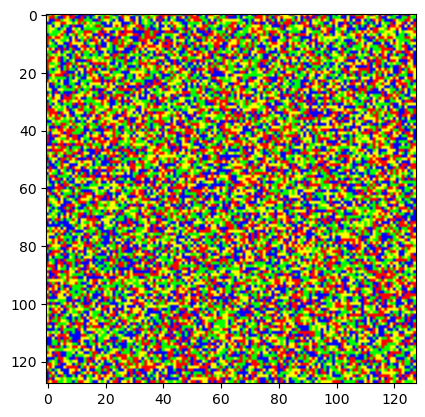

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 0.0),
]
img = np.zeros(shape=(128, 128, 3))
# print(img)
for i in range(128):
    for j in range(128):
        img[i, j] = random.choice(colors)
plt.imshow(img)

In [ ]:
df = pd.read_csv("colorData3.csv")

In [ ]:
df.head()

In [ ]:
for i, j in df.iterrows():
    name = j["Name"]
    number = name.split(".")[0]
    n = int(number + 1)
    new_name = "{:04d}".format(n) + ".jpg"
    df.loc[i, "Name"] = new_name